In [57]:
import pandas as pd, numpy as np
from geopy.geocoders import Nominatim
import matplotlib.pyplot as plt

# Delhi-Electricity-SubStations Data

In [58]:
data = pd.read_csv(r"C:\Users\sreya\Downloads\PythonTest2\PythonTest2\Delhi-Electricity-SubStations.csv")

In [59]:
data

,_id,Substations,Telephone Numbers,Address,Voltage Class,Coordinates
0,1,Bawana,27791190/1193/1210,"400kV Sub-Station Bawana, Sector-5, DSIIDC Baw...",400 kV,"28.79568, 77.0723"
1,2,Bamnauli,25314199/25314204,"Village-Bamnauli, P.O. Dhul Sirus, Near Chhawa...",400 kV,"28.5447, 77.03269"
2,3,Harsh Vihar,0120-6500138,"Harsh Vihar, Loni Road (Near Bhopura Chowk), D...",400 kV,"28.71185, 77.29044"
3,4,Tikri Kalan(Mundka),65108444/7290010893,"Neewala Village Road, Near Vaishno Devi Mandir...",400 kV,"28.67671, 76.98639"
4,5,BTPS,26948637,"Badarpur Thermal Power Station Complex, Badarp...",220 kV,"28.50765, 77.30015"
5,6,DSIDC Bawana,65005603/7290013476,"Near H Block, J.J. colony, Bawana Hanuman Mand...",220 kV,"28.80361, 77.05284"
6,7,DIAL,25655090,"Near IGI Airport, Delhi",220 kV,"28.55616, 77.09995"
7,8,Electric Lane,23329790,"HCM Lane, Behind BSNL Building, Janpath, New D...",220 kV,"28.62174, 77.21969"
8,9,Geeta Colony,22044528,"Near Sai Memorial Public School, Geeta Colony,...",220 kV,"28.65226, 77.26774"
9,10,Gazipur,22770009,"Village Gazipur, Near DDA Janta Flat, Delhi-11...",220 kV,"28.62961, 77.31898"


In [60]:
#Separating the telephone numbers column into 3 different number columns
data[['Telephone1', 'Telephone2','Telephone3']] = data['Telephone Numbers'].str.split('/', expand=True)

# droping the telephone number column
data.drop(columns=['Telephone Numbers'],inplace=True)

In [61]:
# Data frame after separation
data.head()

,_id,Substations,Address,Voltage Class,Coordinates,Telephone1,Telephone2,Telephone3
0,1,Bawana,"400kV Sub-Station Bawana, Sector-5, DSIIDC Baw...",400 kV,"28.79568, 77.0723",27791190,1193,1210
1,2,Bamnauli,"Village-Bamnauli, P.O. Dhul Sirus, Near Chhawa...",400 kV,"28.5447, 77.03269",25314199,25314204,None
2,3,Harsh Vihar,"Harsh Vihar, Loni Road (Near Bhopura Chowk), D...",400 kV,"28.71185, 77.29044",0120-6500138,None,None
3,4,Tikri Kalan(Mundka),"Neewala Village Road, Near Vaishno Devi Mandir...",400 kV,"28.67671, 76.98639",65108444,7290010893,None
4,5,BTPS,"Badarpur Thermal Power Station Complex, Badarp...",220 kV,"28.50765, 77.30015",26948637,None,None


In [63]:
data['Address'][0]

'400kV Sub-Station Bawana, Sector-5, DSIIDC Bawana, Bawana, Delhi-110039'

In [89]:
geolocator = Nominatim(user_agent='GetLoc')



In [90]:
latitude = []
longitude = []

for i in data['Address']:
    location = geolocator.geocode(i)
    print(location)
   # if location:
   #     latitude.append(location.latitude)
    #    longitude.append(location.longitude)
        
   

None
None
None
None
None
None
None
None
None
None
None
IP Extension, Oriental Apartment Road, Indraprastha Extension, Preet Vihar Tehsil, East Delhi District, Delhi, 110091, India
None
None
None
None
None
None
None
None
None
None
None
None
Sector  8, Delhi Cantonment, Dwarka, Delhi, India
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
None
Vasant Kunj, Vasant Vihar Tehsil, New Delhi District, Delhi, India
None


In [30]:
longitude

[77.310718, 77.0730945, 77.1541335]

In [31]:
latitude

[28.6319032, 28.5711087, 28.5292495]

In [35]:
geolocator.geocode(data['Address'][0])

# MH-Vehicle-Reg data

In [4]:
df = pd.read_csv(r"C:\Users\sreya\Downloads\PythonTest2\PythonTest2\MH-Vehicle-Reg.csv",sep=';')

In [5]:
df

,_id,Sr No.,Year,Region,Sub Region,Motor Cycles,Scooters,Moped,Cars,Jeeps,...,Private Service Vehicles,Ambulances,Articulated/Multi.,Trucks & Lorries,Tanker,Delivery Van (4 wheelers),Delivery Van (3 wheelers),Tractors,Trailors,Others
0,1,1,2000-2001,Greater Mumbai,Mumbai(C),84289,62444,7289,164758,12727,...,829,902,0,9022,1214,9329,4079,867,866,3761
1,2,2,2000-2001,Greater Mumbai,Mumbai(W),80320,96297,15230,110397,5465,...,605,298,0,5637,117,5019,9517,370,127,445
2,3,3,2000-2001,Greater Mumbai,Mumbai(E),39930,44932,9786,42945,4439,...,279,158,0,3811,697,4180,4004,124,170,577
3,4,4,2000-2001,Greater Mumbai,Borivali,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,5,2000-2001,Thane Region,Thane,130448,104028,9304,96933,23755,...,1030,206,0,42289,8159,21309,8228,1107,4352,740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,896,896,2017-2018,Nagpur(R) Region,Nagpur Rural,292925,83106,32112,29634,14171,...,335,224,1502,12391,217,12095,2409,13044,3580,1437
896,897,897,2017-2018,Nagpur(R) Region,Gadchiroli,92015,22833,1974,5212,3036,...,45,165,4,512,29,2088,157,7559,3743,133
897,898,898,2017-2018,Nagpur(R) Region,Chandrapur,272891,96182,58270,30185,7630,...,126,393,1497,9866,280,8377,2505,13576,7034,1016
898,899,899,2017-2018,Nagpur(R) Region,Gondia,167075,35236,19699,10472,4357,...,67,102,4,1887,139,3241,463,8999,5212,256


In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   _id                           900 non-null    int64 
 1   Sr No.                        900 non-null    int64 
 2   Year                          900 non-null    object
 3   Region                        900 non-null    object
 4   Sub Region                    900 non-null    object
 5   Motor Cycles                  900 non-null    int64 
 6   Scooters                      900 non-null    int64 
 7   Moped                         900 non-null    int64 
 8   Cars                          900 non-null    int64 
 9   Jeeps                         900 non-null    int64 
 10  Stn. Wagons                   900 non-null    int64 
 11  Taxis meter fited             900 non-null    int64 
 12  Luxury /Turist Cabs/          900 non-null    int64 
 13  Auto-rikshaws       

In [ ]:
['Stage carriages','Contract carriages /Mini Bus','School Buses',' Trucks & Lorries','Tanker','Tractors','Trailors']

In [143]:
df['Year'].astype('object')

0      2000-2001
1      2000-2001
2      2000-2001
3      2000-2001
4      2000-2001
         ...    
895    2017-2018
896    2017-2018
897    2017-2018
898    2017-2018
899    2017-2018
Name: Year, Length: 900, dtype: object

In [144]:
df.describe()
df

,_id,Sr No.,Year,Region,Sub Region,Motor Cycles,Scooters,Moped,Cars,Jeeps,...,Private Service Vehicles,Ambulances,Articulated/Multi.,Trucks & Lorries,Tanker,Delivery Van (4 wheelers),Delivery Van (3 wheelers),Tractors,Trailors,Others
0,1,1,2000-2001,Greater Mumbai,Mumbai(C),84289,62444,7289,164758,12727,...,829,902,0,9022,1214,9329,4079,867,866,3761
1,2,2,2000-2001,Greater Mumbai,Mumbai(W),80320,96297,15230,110397,5465,...,605,298,0,5637,117,5019,9517,370,127,445
2,3,3,2000-2001,Greater Mumbai,Mumbai(E),39930,44932,9786,42945,4439,...,279,158,0,3811,697,4180,4004,124,170,577
3,4,4,2000-2001,Greater Mumbai,Borivali,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,5,2000-2001,Thane Region,Thane,130448,104028,9304,96933,23755,...,1030,206,0,42289,8159,21309,8228,1107,4352,740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895,896,896,2017-2018,Nagpur(R) Region,Nagpur Rural,292925,83106,32112,29634,14171,...,335,224,1502,12391,217,12095,2409,13044,3580,1437
896,897,897,2017-2018,Nagpur(R) Region,Gadchiroli,92015,22833,1974,5212,3036,...,45,165,4,512,29,2088,157,7559,3743,133
897,898,898,2017-2018,Nagpur(R) Region,Chandrapur,272891,96182,58270,30185,7630,...,126,393,1497,9866,280,8377,2505,13576,7034,1016
898,899,899,2017-2018,Nagpur(R) Region,Gondia,167075,35236,19699,10472,4357,...,67,102,4,1887,139,3241,463,8999,5212,256


In [145]:
df[['Region','Sub Region','Year']].head(60)

,Region,Sub Region,Year
0,Greater Mumbai,Mumbai(C),2000-2001
1,Greater Mumbai,Mumbai(W),2000-2001
2,Greater Mumbai,Mumbai(E),2000-2001
3,Greater Mumbai,Borivali,2000-2001
4,Thane Region,Thane,2000-2001
5,Thane Region,Kalyan,2000-2001
6,Thane Region,Vashi Navi Mumbai,2000-2001
7,Thane Region,Vasai,2000-2001
8,Panvel Region,Panvel,2000-2001
9,Panvel Region,Pen-Raigad,2000-2001


In [6]:
#Extract the years from the 'Year' column
df['Year'] = df['Year'].str.extract(r'(\d{4})')[0].astype(int)

#Group the data by 'Region', 'Sub Region', and 'Year' and sum the values
merged_data = df.groupby(['Region', 'Sub Region', 'Year']).sum().reset_index()

In [7]:
df = df.drop(columns=['_id','Sr No.'])


In [121]:
df['total_vehicles']=df.iloc[:,3:].sum(axis=1)

In [122]:
df.head(20)

,Year,Region,Sub Region,Motor Cycles,Scooters,Moped,Cars,Jeeps,Stn. Wagons,Taxis meter fited,...,Ambulances,Articulated/Multi.,Trucks & Lorries,Tanker,Delivery Van (4 wheelers),Delivery Van (3 wheelers),Tractors,Trailors,Others,total_vehicles
0,2000,Greater Mumbai,Mumbai(C),84289,62444,7289,164758,12727,2705,40451,...,902,0,9022,1214,9329,4079,867,866,3761,412871
1,2000,Greater Mumbai,Mumbai(W),80320,96297,15230,110397,5465,962,11460,...,298,0,5637,117,5019,9517,370,127,445,406841
2,2000,Greater Mumbai,Mumbai(E),39930,44932,9786,42945,4439,472,10536,...,158,0,3811,697,4180,4004,124,170,577,209851
3,2000,Greater Mumbai,Borivali,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2000,Thane Region,Thane,130448,104028,9304,96933,23755,730,3320,...,206,0,42289,8159,21309,8228,1107,4352,740,513516
5,2000,Thane Region,Kalyan,42910,53177,7143,10968,3183,97,921,...,96,0,5897,308,1998,3853,141,217,83,158185
6,2000,Thane Region,Vashi Navi Mumbai,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2000,Thane Region,Vasai,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2000,Panvel Region,Panvel,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2000,Panvel Region,Pen-Raigad,37045,37112,3324,19977,7991,307,3339,...,157,0,8223,628,3855,2784,420,566,384,141728


In [ ]:
df

In [149]:
df[' Private Service'] = df[[ 'Motor Cycles', 'Scooters', 'Moped', 'Cars', 'Jeeps', 'Stn. Wagons']].sum(axis=1)

In [129]:
plot_vehicle_classification(2010)

C:\Users\sreya\AppData\Local\Temp\ipykernel_26384\1903156879.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  private_vehicles = year_df.iloc[:,1:9].sum(axis=1)


,Private,Commercial,LMV,HMV
500,544049,630996,1193327,9025
501,758799,974071,1732641,8475
502,332342,458545,795378,1776
503,0,0,0,0
504,1076239,1706839,2688955,97565
505,356974,484895,831100,10984
506,171461,291436,442009,20889
507,0,0,0,0
508,0,0,0,0
509,354448,536740,865752,25596


In [ ]:
df[' Private Service']

In [ ]:
x=[ 'Motor Cycles', 'Scooters', 'Moped', 'Cars', 'Jeeps', 'Stn. Wagons']
df[x].sum(axis=1)

In [ ]:
df

In [38]:
 year_df = df[df['Year'] == 2001]

In [67]:
year_df.iloc[:,0:9]

,Year,Motor Cycles,Scooters,Moped,Cars,Jeeps,Stn. Wagons,Taxis meter fited,Luxury /Turist Cabs/
50,2001,92577,64803,7438,165939,12404,2705,41064,0
51,2001,91007,101708,15255,114564,5657,962,11881,0
52,2001,47565,45150,9849,46383,4499,304,10734,0
53,2001,0,0,0,0,0,0,0,0
54,2001,154068,109713,10982,113403,26585,733,4203,0
55,2001,50194,54972,8413,11909,3160,97,1021,0
56,2001,0,0,0,0,0,0,0,0
57,2001,0,0,0,0,0,0,0,0
58,2001,0,0,0,0,0,0,0,0
59,2001,45679,39560,3326,21777,8303,307,5108,0


In [40]:
 private_vehicles = year_df.iloc[:,3:9].sum(axis=1)

In [26]:
private_vehicles

50    345866
51    329153
52    153750
53         0
54    415484
55    128745
56         0
57         0
58         0
59    118952
60     63030
61     31299
62    277374
63    177260
64    159451
65         0
66    836898
67    197321
68    239133
69         0
70         0
71    346211
72    128588
73    125772
74         0
75     89930
76    180608
77         0
78    213685
79     39589
80     57213
81     55145
82     25219
83         0
84     61736
85     27931
86     20828
87    134601
88     58929
89     76298
90     72055
91     42369
92    559477
93     51747
94         0
95         0
96     15120
97     94298
98    170386
99      1993
dtype: int64

In [41]:
year_df[['Stage carriages','Contract carriages /Mini Bus','School Buses','Trucks & Lorries','Tanker','Tractors','Trailors']]

,Stage carriages,Contract carriages /Mini Bus,School Buses,Trucks & Lorries,Tanker,Tractors,Trailors
50,5258,1887,67,8873,1194,867,850
51,0,1433,442,4409,241,391,80
52,0,974,49,3738,679,124,170
53,0,0,0,0,0,0,0
54,821,2002,120,45525,8253,1178,4607
55,326,312,28,6034,308,154,223
56,0,0,0,0,0,0,0
57,0,0,0,0,0,0,0
58,0,0,0,0,0,0,0
59,633,153,191,8189,866,460,615


In [46]:
year_df =year_df.drop(['Region','Sub Region'],axis=1)

In [56]:
year_df['Moped'].values

array([  7438,  15255,   9849,      0,  10982,   8413,      0,      0,
            0,   3326,   3962,   1842,  52667,  28280,  22254,      0,
       143413,  47084,  30156,      0,      0,  44226,  29359,  15046,
            0,  18016,  43926,      0,  47012,   7481,  13116,  14793,
         2958,      0,  16472,   7590,   5768,  54530,  14136,  27407,
        21242,  12500, 194314,  15941,      0,      0,   1635,  26458,
        21531,    352], dtype=int64)

In [163]:
def plot_vehicle_classification(year):
    # Filter the DataFrame for the specified year
    year_df = df[df['Year'] == year]
    
    #private_service = ['Motor Cycles', 'Scooters', 'Moped', 'Cars', 'Jeeps', 'Stn. Wagons']

    # Classify vehicles into Private, Commercial, and Others
    private_vehicles = year_df.iloc[:,1:9].sum(axis=1)
    
    commercial_vehicles = year_df.iloc[:,10:].sum(axis=1)
    
   # others = year_df[private_service].sum(axis=1)

    # Classify Commercial vehicles into LMV and HMV
    hmv_list = ['Stage carriages','Contract carriages /Mini Bus',
                'School Buses','Trucks & Lorries','Tanker','Tractors','Trailors']
    
    hmvs = year_df[hmv_list].sum(axis=1)
    
    year_df =year_df.drop(['Region','Sub Region','Year'],axis=1)
    #year_df =year_df.drop(s,axis=1)
    
    lmvs =year_df.drop(hmv_list,axis=1).sum(axis=1)

    # Create a new DataFrame for plotting
    plot_df = pd.DataFrame({
        "Private": private_vehicles,
        "Commercial": commercial_vehicles,
        "LMV": lmvs,
        "HMV": hmvs,
        
    })
    
    total_count = df['total_vehicles'].sum()
    private_count = plot_df['Private'].sum()
    hmv_count = plot_df['HMV'].sum()
    lmv_count = plot_df['LMV'].sum()
    commercial_count = plot_df['Commercial'].sum()
    
    # Calculate percentages
    private_percent = (private_count / total_count) * 100
    hmv_percent = (hmv_count / total_count) * 100
    lmv_percent = (lmv_count / total_count) * 100
    others_percent = (commercial_count / total_count) * 100

    #return plot_df
    

    # Create a pie chart
    labels = ['Private', 'HMV', 'LMV',"commercials"]
    sizes = [private_percent, hmv_percent, lmv_percent,others_percent]
    colors = ['lightcoral', 'lightskyblue', 'lightgreen','blue']
    explode = (0.1, 0, 0,0)  # explode the 1st slice (Private)
    plt.pie(sizes, explode=explode, labels=labels, colors=colors, 
            autopct=lambda p: f'{p:.1f}%\n({int(p * total_count / 100)})', shadow=True, startangle=140)
    plt.title(f'Vehicle Classification for {year}')
    
    # Display the legend
    plt.legend()

    # Show the plot
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

C:\Users\sreya\AppData\Local\Temp\ipykernel_26384\623758939.py:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  private_vehicles = year_df.iloc[:,1:9].sum(axis=1)


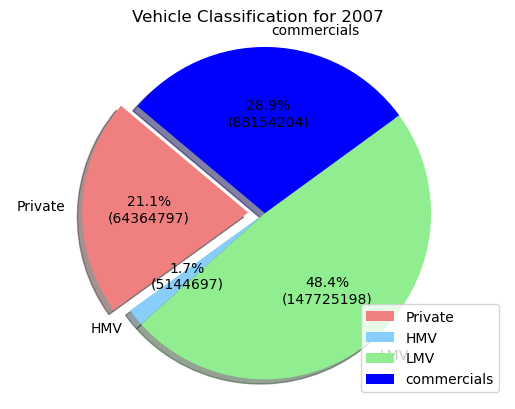

In [176]:
plot_vehicle_classification(2007)

In [111]:
df['Moped'].sum()

24418109

In [123]:
df.iloc[:,3:].sum(axis=1).sum()

610777810

In [174]:
(df['total_vehicles'].sum() /100) / (year_df.iloc[:,1:9].sum(axis=1).sum())

0.4909375092938297

In [172]:
year_df.iloc[:,1:9].sum(axis=1).sum()

6220525